### Image Data Inspection

**Q1. What is COCO?**

`COCO` stands for `Common Objects in Context`. It's a large, publicly available dataset of images used to train and test computer vision models for tasks like object detection and image segmentation.

**Q2. What does it Contain?**

The `COCO 2017` dataset contains hundreds of thousands of real-world photographs with detailed annotations. Each image typically has multiple objects of different types, and each object is carefully labeled with:

- A bounding box (rectangular border around the object)

- A segmentation mask (precise pixel-level outline of the object)

- The object's category/class name (e.g., "person", "car", "dog")

- Dataset Size:

  - 118,000 training images (for teaching the model)

  - 5,000 validation images (for testing during training)

  - 40,700 test images (for final model evaluation)

  - 80 object categories to detect (things like people, animals, vehicles, furniture, etc.)

  - Over 1.5 million labeled objects across all images

**Q3. How is it organized?**

The dataset has a folder structure with:

- Images folder: Contains actual `.jpg` image files

- Annotations folder: Contains `JSON` files with all the labeling information (bounding boxes, masks, categories, etc.)

#### Import Libraries and Set Paths
- Set up the environment by importing necessary libraries and defining the paths to your COCO dataset folders and annotation files.

In [1]:
import os
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

# Path to extract COCO Dataset
coco_root = r"A:\img\coco2017"  # e.g., "coco_2017"
images_dir = os.path.join(coco_root, "train2017")  # or val2017
annotations_file = os.path.join(coco_root, "annotations", "instances_train2017.json")

#### Load COCO Annotations
- Now load up the `COCO JSON` annotation file and parses it into Python dictionaries for efficient data access.

In [1]:
import os

coco_root = r"A:\img\coco2017"
ann_dir = os.path.join(coco_root, "annotations")

print("annotations dir:", ann_dir)
print("exists:", os.path.exists(ann_dir))
if os.path.exists(ann_dir):
    files = os.listdir(ann_dir)
    print("files in annotations (count={}):".format(len(files)))
    for fn in files:
        print(" -", fn)
else:
    print("annotations folder not found. Please check path.")


annotations dir: A:\img\coco2017\annotations
exists: True
files in annotations (count=6):
 - captions_train2017.json
 - captions_val2017.json
 - instances_train2017.json
 - instances_val2017.json
 - person_keypoints_train2017.json
 - person_keypoints_val2017.json


In [2]:
import platform, os
print("platform:", platform.system())
print("A: exists?:", os.path.exists(r"A:\img\coco2017"))
print("annotations exists?:", os.path.exists(r"A:\img\coco2017\annotations"))


platform: Windows
A: exists?: True
annotations exists?: True


In [4]:
import os

# Your correct local COCO folder path
coco_root = r"A:\img\coco2017"

# Define annotations file path
annotations_file = os.path.join(coco_root, "annotations", "instances_train2017.json")

# Define images folder
images_dir = os.path.join(coco_root, "train2017")

print("Annotations file:", annotations_file)
print("Exists:", os.path.exists(annotations_file))

print("Images dir:", images_dir)
print("Exists:", os.path.exists(images_dir))


Annotations file: A:\img\coco2017\annotations\instances_train2017.json
Exists: True
Images dir: A:\img\coco2017\train2017
Exists: True


In [6]:
# Run this in a NEW cell (copy-paste exactly)
import os, json, traceback
from pprint import pprint

coco_root = r"A:\img\coco2017"
annotations_file = os.path.join(coco_root, "annotations", "instances_train2017.json")
images_dir = os.path.join(coco_root, "train2017")

print("Connected local?", __import__('platform').system())
print("annotations_file:", annotations_file)
print("annotations exists:", os.path.exists(annotations_file))
print("images_dir exists:", os.path.exists(images_dir))
print()

# Try to load JSON safely and print summary
try:
    with open(annotations_file, "r", encoding="utf-8") as f:
        coco_data = json.load(f)
    print("Loaded annotations JSON successfully.")
    print("Top-level keys:", list(coco_data.keys()))
    print("Number of images:", len(coco_data.get("images", [])))
    print("Number of categories:", len(coco_data.get("categories", [])))
    print("Number of annotations:", len(coco_data.get("annotations", [])))
    # show one image entry and one annotation as sample (if exists)
    if coco_data.get("images"):
        print("\nSample image entry:")
        pprint(coco_data["images"][0])
    if coco_data.get("annotations"):
        print("\nSample annotation entry:")
        pprint(coco_data["annotations"][0])
except Exception as e:
    print("ERROR while loading annotations JSON:")
    traceback.print_exc()


Connected local? Windows
annotations_file: A:\img\coco2017\annotations\instances_train2017.json
annotations exists: True
images_dir exists: True

Loaded annotations JSON successfully.
Top-level keys: ['info', 'licenses', 'images', 'annotations', 'categories']
Number of images: 118287
Number of categories: 80
Number of annotations: 860001

Sample image entry:
{'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'date_captured': '2013-11-14 11:18:45',
 'file_name': '000000391895.jpg',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'height': 360,
 'id': 391895,
 'license': 3,
 'width': 640}

Sample annotation entry:
{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
                   260.24,
                   222.04,
                   270.49,
                   199.84,
                   253.41,
                   213.

In [7]:
with open(annotations_file, 'r') as f:
    coco_data = json.load(f)


In [8]:
# Load COCO annotations
with open(annotations_file, 'r') as f:
    coco_data = json.load(f)

# Create dictionaries for quick lookup
images_by_id = {img['id']: img for img in coco_data['images']}
categories_by_id = {cat['id']: cat for cat in coco_data['categories']}

# Group annotations by image_id
annotations_by_image = {}
for ann in coco_data['annotations']:
    img_id = ann['image_id']
    if img_id not in annotations_by_image:
        annotations_by_image[img_id] = []
    annotations_by_image[img_id].append(ann)

print(f"Total images: {len(coco_data['images'])}")
print(f"Total categories: {len(coco_data['categories'])}")
print(f"Total annotations: {len(coco_data['annotations'])}")

Total images: 118287
Total categories: 80
Total annotations: 860001


#### Display Dataset Statistics
- This function analyzes the entire dataset and prints statistics about object distribution across categories to understand dataset composition.



In [9]:
def print_dataset_stats():
    print("\n--- Dataset Statistics ---")
    category_counts = {}
    for ann in coco_data['annotations']:
        cat_id = ann['category_id']
        cat_name = categories_by_id[cat_id]['name']
        category_counts[cat_name] = category_counts.get(cat_name, 0) + 1

    print("\nObject counts per category (top 10):")
    sorted_cats = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    for cat_name, count in sorted_cats:
        print(f"  {cat_name}: {count}")
print_dataset_stats()


--- Dataset Statistics ---

Object counts per category (top 10):
  person: 262465
  car: 43867
  chair: 38491
  book: 24715
  bottle: 24342
  cup: 20650
  dining table: 15714
  bowl: 14358
  traffic light: 12884
  handbag: 12354


#### Inspect Single Image with Annotations
- This core function that loads a specific image by ID and displays its metadata, objects, and visualizations with bounding boxes and segmentation masks.

In [10]:
def inspect_image_with_annotations(image_id, visualize_bbox=True, visualize_mask=True):
    # Load image
    image_info = images_by_id[image_id]
    image_path = os.path.join(images_dir, image_info['file_name'])
    image = Image.open(image_path).convert("RGB")

    # Print image info
    print(f"\n--- Image Inspection ---")
    print(f"Image ID: {image_id}")
    print(f"Filename: {image_info['file_name']}")
    print(f"Size: {image.size} (width x height)")
    print(f"Mode: {image.mode}")

    # Get annotations for this image
    annotations = annotations_by_image.get(image_id, [])
    print(f"Number of objects: {len(annotations)}")

    # Print object categories in this image
    print("\nObjects in this image:")
    for ann in annotations:
        cat_id = ann['category_id']
        cat_name = categories_by_id[cat_id]['name']
        bbox = ann['bbox']
        area = ann['area']
        print(f"  - {cat_name}: bbox={bbox}, area={area:.0f}px")

    # Visualize
    if visualize_bbox or visualize_mask:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.imshow(image)

        # Draw bounding boxes
        if visualize_bbox:
            for ann in annotations:
                bbox = ann['bbox']
                x, y, w, h = bbox
                rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

                cat_id = ann['category_id']
                cat_name = categories_by_id[cat_id]['name']
                ax.text(x, y-5, cat_name, fontsize=8, color='red',
                       bbox=dict(facecolor='white', alpha=0.7))

        # Draw segmentation masks
        if visualize_mask:
            for ann in annotations:
                if 'segmentation' in ann and len(ann['segmentation']) > 0:
                    seg = ann['segmentation'][0]  # Get first polygon
                    if isinstance(seg, list) and len(seg) > 4:
                        # Reshape to (N, 2) for polygon
                        polygon = np.array(seg).reshape(-1, 2)
                        poly = Polygon(polygon, alpha=0.3, color='blue')
                        ax.add_patch(poly)

        ax.axis('off')
        ax.set_title(f"Image ID: {image_id}")
        plt.tight_layout()
        plt.show()

#### Inspect Image by Index

- This helper function allows to inspect images by their position in the dataset (0, 1, 2, etc.) without needing to know the image ID.

In [14]:
# Run this first (new cell)
import os, json
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

print("Imports OK. PIL Image available:", 'Image' in globals() or 'Image' in locals())


Imports OK. PIL Image available: True


In [16]:
import os, json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

# ---- CHANGE THIS ONLY IF NEEDED ----
coco_root = r"A:\img\coco2017"
images_dir = os.path.join(coco_root, "train2017")
ann_file = os.path.join(coco_root, "annotations", "instances_train2017.json")

# Load JSON
with open(ann_file, "r") as f:
    coco = json.load(f)

images = {i["id"]: i for i in coco["images"]}
cats = {c["id"]: c for c in coco["categories"]}

anns_by_image = {}
for ann in coco["annotations"]:
    anns_by_image.setdefault(ann["image_id"], []).append(ann)

print("Loaded:", len(images), "images and", len(coco["annotations"]), "annotations")


Loaded: 118287 images and 860001 annotations



--- Image Inspection ---
Image ID: 391895
Filename: 000000391895.jpg
Size: (640, 360) (width x height)
Mode: RGB
Number of objects: 4

Objects in this image:
  - motorcycle: bbox=[359.17, 146.17, 112.45, 213.57], area=12190px
  - person: bbox=[339.88, 22.16, 153.88, 300.73], area=14107px
  - person: bbox=[471.64, 172.82, 35.92, 48.1], area=708px
  - bicycle: bbox=[486.01, 183.31, 30.63, 34.98], area=627px


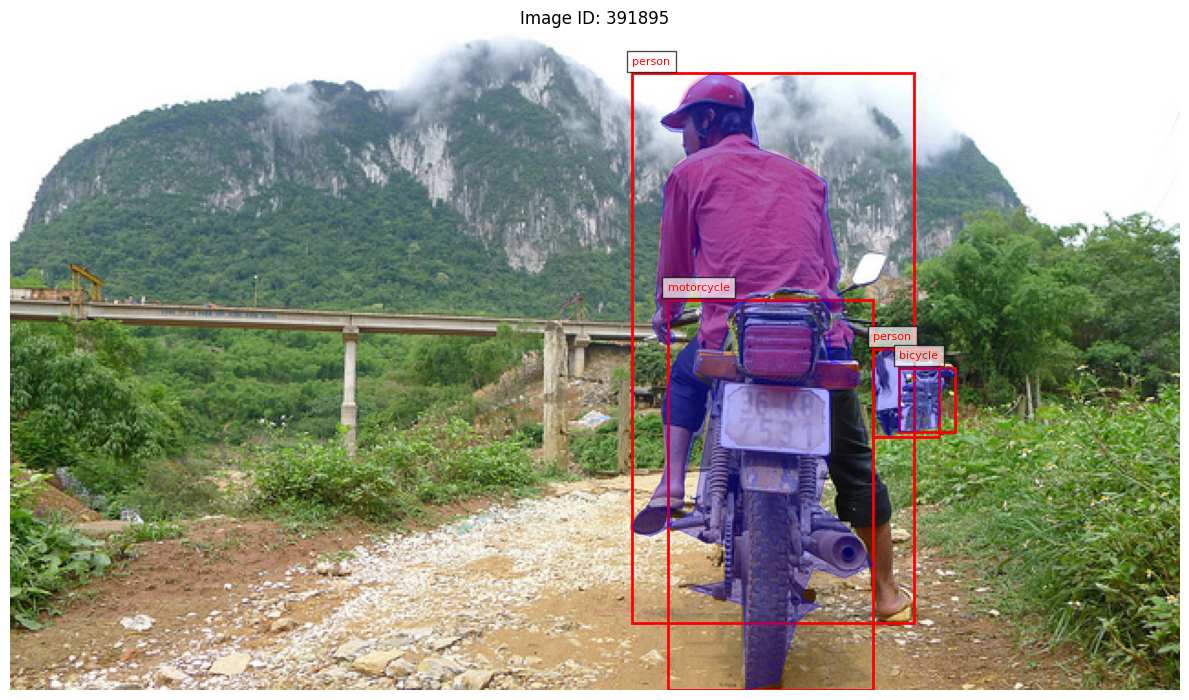

In [17]:
def inspect_image_by_index(index=0):
    image_ids = list(images_by_id.keys())
    if index < len(image_ids):
        image_id = image_ids[index]
        inspect_image_with_annotations(image_id, visualize_bbox=True, visualize_mask=True)
    else:
        print(f"Index {index} out of range. Total images: {len(image_ids)}")

inspect_image_by_index(index=0)

#### Inspect Random Images

- This function randomly selects and inspects multiple images from the dataset to get a diverse view of different samples.


--- Image Inspection ---
Image ID: 493702
Filename: 000000493702.jpg
Size: (500, 335) (width x height)
Mode: RGB
Number of objects: 13

Objects in this image:
  - umbrella: bbox=[0.0, 0.75, 249.37, 80.37], area=17074px
  - person: bbox=[277.03, 271.01, 63.24, 59.47], area=2501px
  - person: bbox=[34.06, 240.24, 19.81, 22.71], area=157px
  - person: bbox=[41.56, 239.79, 6.02, 12.05], area=47px
  - person: bbox=[46.08, 240.62, 9.18, 15.89], area=58px
  - person: bbox=[49.59, 240.45, 8.33, 12.07], area=54px
  - person: bbox=[26.21, 241.85, 7.63, 12.96], area=69px
  - bench: bbox=[0.0, 281.48, 97.82, 52.75], area=3975px
  - person: bbox=[21.25, 245.6, 5.67, 11.6], area=44px
  - person: bbox=[173.93, 257.5, 62.58, 77.5], area=2789px
  - person: bbox=[0.0, 175.95, 6.1, 31.17], area=136px
  - person: bbox=[0.0, 221.34, 33.86, 65.94], area=1195px
  - person: bbox=[389.59, 264.69, 14.89, 9.93], area=98px


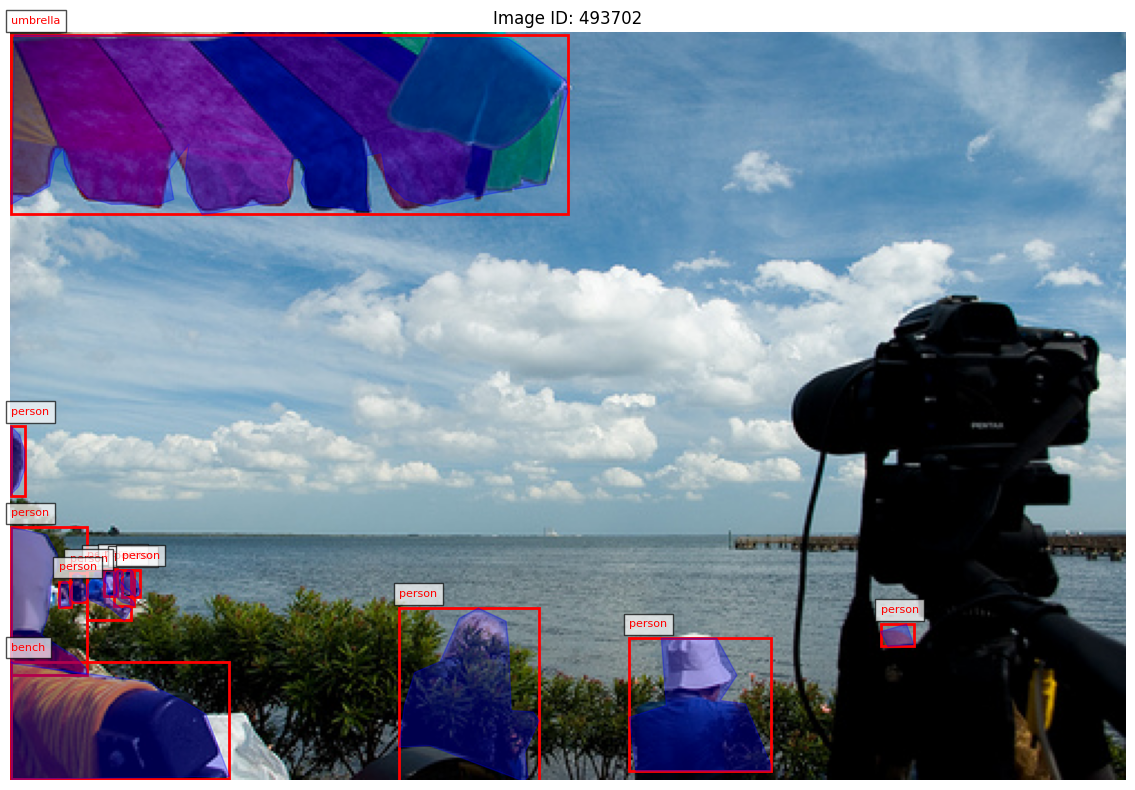


--- Image Inspection ---
Image ID: 169474
Filename: 000000169474.jpg
Size: (480, 640) (width x height)
Mode: RGB
Number of objects: 2

Objects in this image:
  - toothbrush: bbox=[226.35, 84.68, 201.72, 470.71], area=29249px
  - toothbrush: bbox=[15.78, 57.33, 288.44, 572.55], area=54892px


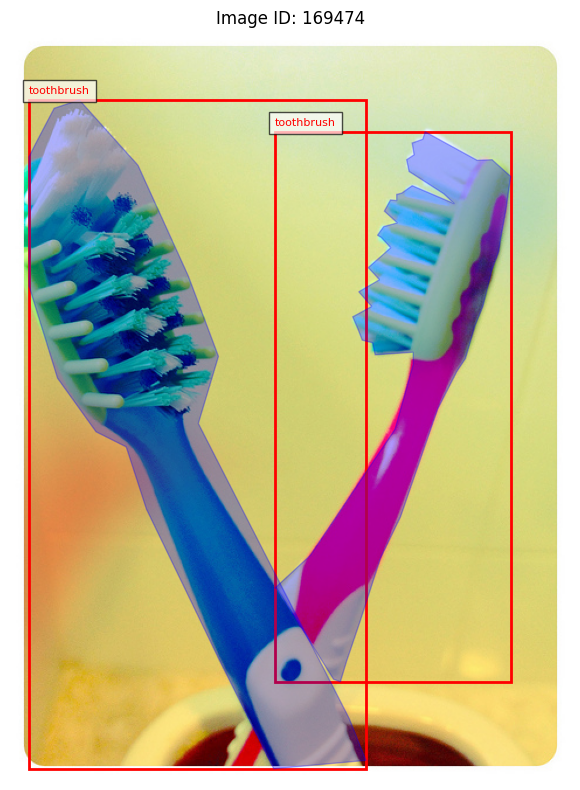


--- Image Inspection ---
Image ID: 351183
Filename: 000000351183.jpg
Size: (640, 478) (width x height)
Mode: RGB
Number of objects: 10

Objects in this image:
  - dining table: bbox=[1.12, 13.57, 638.88, 457.76], area=289204px
  - cup: bbox=[23.86, 73.58, 181.05, 161.38], area=19601px
  - cup: bbox=[274.1, 0.21, 76.13, 100.15], area=6399px
  - fork: bbox=[242.83, 330.55, 315.25, 127.4], area=4814px
  - knife: bbox=[415.22, 176.75, 180.92, 146.45], area=3184px
  - bowl: bbox=[459.44, 125.32, 135.95, 113.15], area=11134px
  - bowl: bbox=[337.72, 71.64, 111.32, 88.31], area=6658px
  - bowl: bbox=[74.61, 36.55, 121.72, 59.7], area=4609px
  - bottle: bbox=[542.76, 0.67, 97.24, 181.46], area=11726px
  - bottle: bbox=[504.07, 4.59, 62.08, 106.78], area=4243px


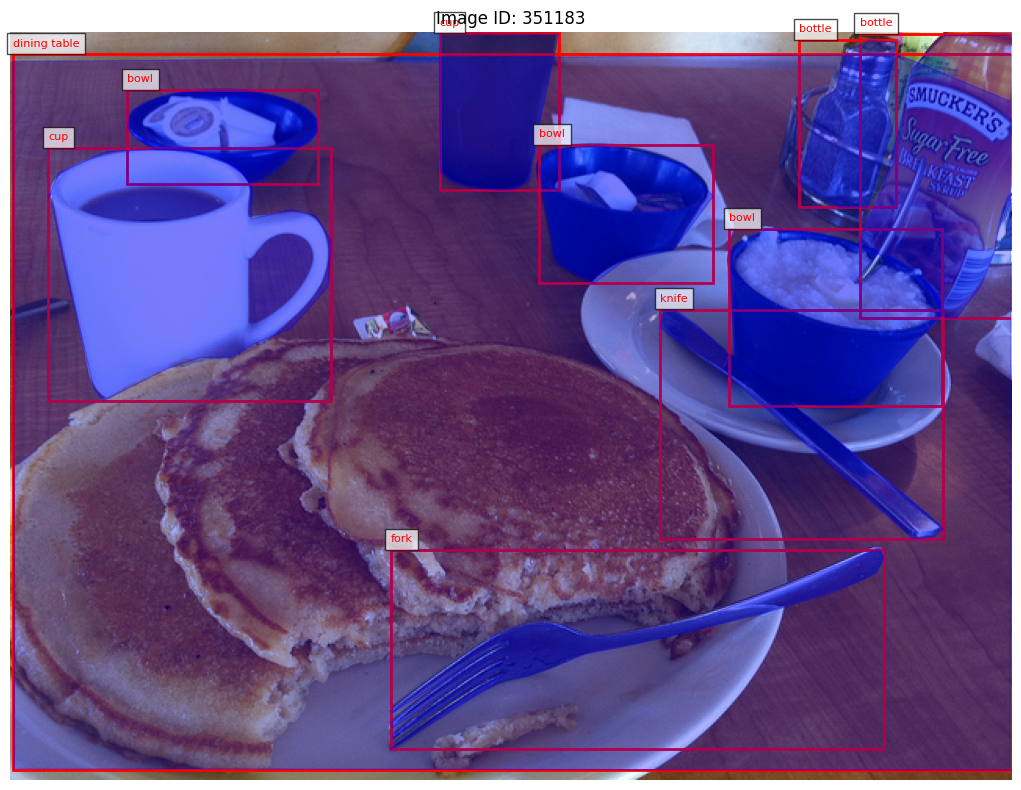

In [18]:
def inspect_random_images(num_samples=3):
    import random
    random_image_ids = random.sample(list(images_by_id.keys()), num_samples)

    for img_id in random_image_ids:
        inspect_image_with_annotations(img_id, visualize_bbox=True, visualize_mask=True)

inspect_random_images(num_samples=3)